# Purchase Conversion by Marketing Campaign

To gain new customers, a given company must explore different marketing outlets - social media, email, etc - to increase the number of customers and revenue. With the provided dataset, we evaluate each type of campaign and its key performance indicators (KPIs) to present findings between each campaign.

Taking this marketing data one step further, different machine learning models are evaluated to help the company better predict if based on the campaign interactions a customer will complete a purchase.

The variables in our data are:

__CustomerID:__ Unique identifier for each customer.

__Age:__ Age of the customer.

__Gender:__ Gender of the customer (Male/Female).

__Income:__ Annual income of the customer in USD.

__CampaignChannel:__ The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).

__CampaignType:__ Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).

__AdSpend:__ Amount spent on the marketing campaign in USD.

__ClickThroughRate:__ Rate at which customers click on the marketing content.

__ConversionRate:__ Rate at which clicks convert to desired actions (e.g., purchases).

__AdvertisingPlatform:__ Confidential.

__AdvertisingTool:__ Confidential.

__WebsiteVisits__: Number of visits to the website.

__PagesPerVisit:__ Average number of pages visited per session.

__TimeOnSite:__ Average time spent on the website per visit (in minutes).

__SocialShares:__ Number of times the marketing content was shared on social media.

__EmailOpens:__ Number of times marketing emails were opened.

__EmailClicks:__ Number of times links in marketing emails were clicked.

__PreviousPurchases:__ Number of previous purchases made by the customer.

__LoyaltyPoints:__ Number of loyalty points accumulated by the customer.

__Target Variable__

__Conversion:__ Binary variable indicating whether the customer converted (1) or not (0).


Data Source: https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset

In [148]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [149]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [150]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [151]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

## Visual Data Analysis

After inspecting our data for missing values and feature engineering, we can beging creating visual models. 

To help us understand how many customers completed a purchase, we create a count plot based on each campaign channel. The plot below accounts for all customers in each campaign channel and coded by whether a customer completed a purchase. 

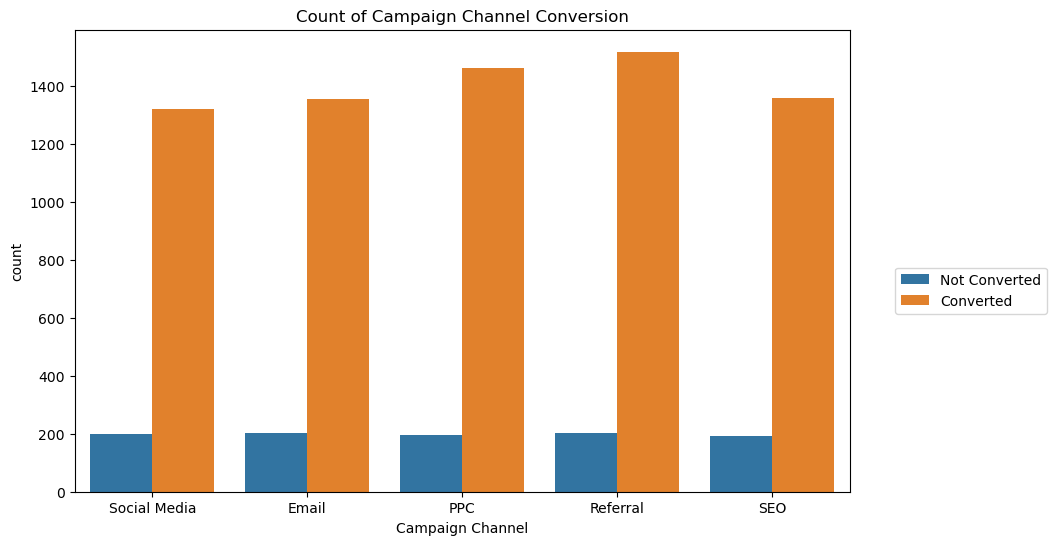

In [153]:
plt.figure(figsize =(10,6))
sns.countplot(df,x = 'CampaignChannel',hue = 'Conversion')
plt.title('Count of Campaign Channel Conversion')
plt.xlabel('Campaign Channel')
plt.legend(bbox_to_anchor = (1.05,0.5),labels = ['Not Converted','Converted'])

Similarly, we want to understand the number of converted customer based on each campaign type regardless of campaign channel. 

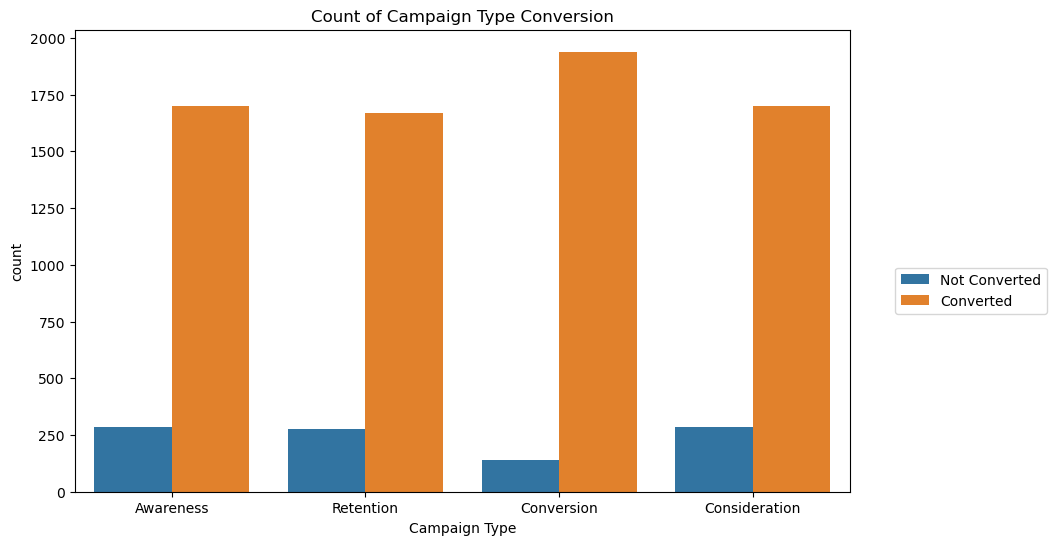

In [154]:
plt.figure(figsize =(10,6))
sns.countplot(df,x = 'CampaignType',hue = 'Conversion')
plt.title('Count of Campaign Type Conversion')
plt.xlabel('Campaign Type')
plt.legend(bbox_to_anchor = (1.05,0.5),labels = ['Not Converted','Converted'])

In [155]:
df['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

The campaign metrics provides insight on a customer level. However, to explore the campaign further, calculation can be performed to determine the average conversion rate (%) percampaign. 

In [156]:
avg_camp_conv_rate = pd.Series(round(100*df.groupby(['CampaignType'])['Conversion'].sum()/len(df),2))

In [157]:
avg_conv_rate = pd.DataFrame(index = df['CampaignType'].unique(),data = avg_camp_conv_rate)

Text(0.5, 1.0, 'Avg. Conversion Rate per Campaign')

<Figure size 1000x600 with 0 Axes>

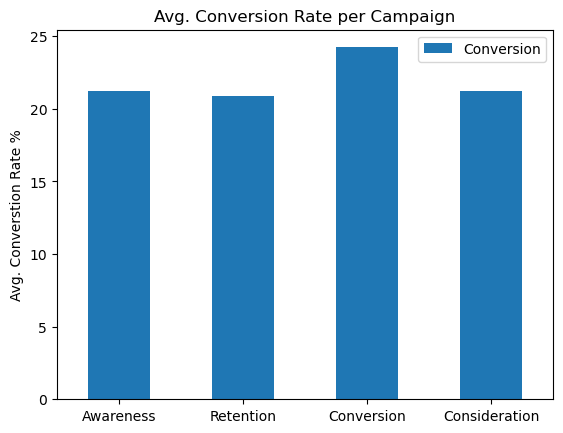

In [158]:
plt.figure(figsize = (10,6))
avg_conv_rate.plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.ylabel('Avg. Converstion Rate %')
plt.title('Avg. Conversion Rate per Campaign')

Likewise, we can calculate what campaign channel yields the highest number of users by identifyong the number of users with zero  _PreviousPurchases_ 

In [159]:
new_customers = df.groupby(['PreviousPurchases','CampaignChannel'])['Conversion'].sum()[0]

Text(0.5, 1.0, 'New Customers per Campaign Channel')

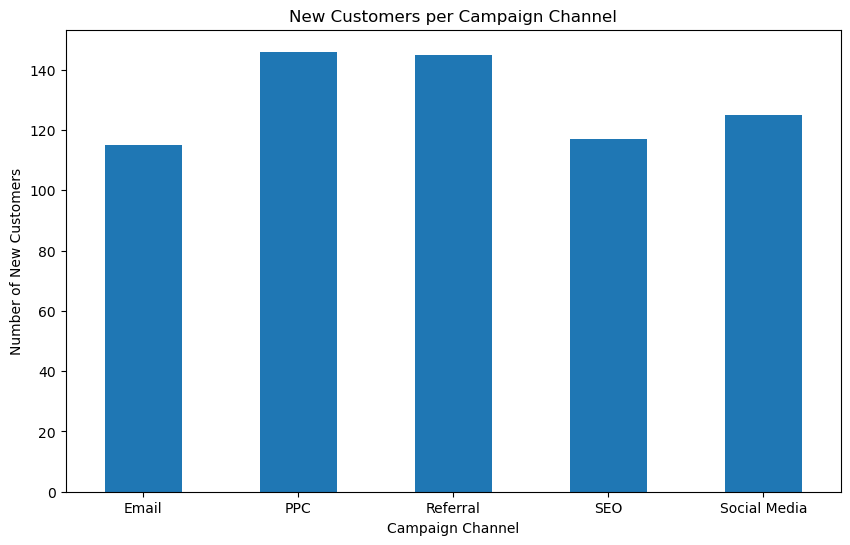

In [160]:
plt.figure(figsize = (10,6))
new_customers.plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.ylabel('Number of New Customers')
plt.xlabel('Campaign Channel')
plt.title('New Customers per Campaign Channel')

Based on the chart above, we note that pay-per-click (PPC) and Referrals have the highest number of new customer. 

To track financial metrics, the customer acquistion cost (CAC) can be calculated. 

To calculate the total acquisiton cost per campaign, we can use the _AdSpend_ by _CampaignType_ divided the total numbers of customers. Similarly, we can calculate the cost of converting a new customer per campaign. 

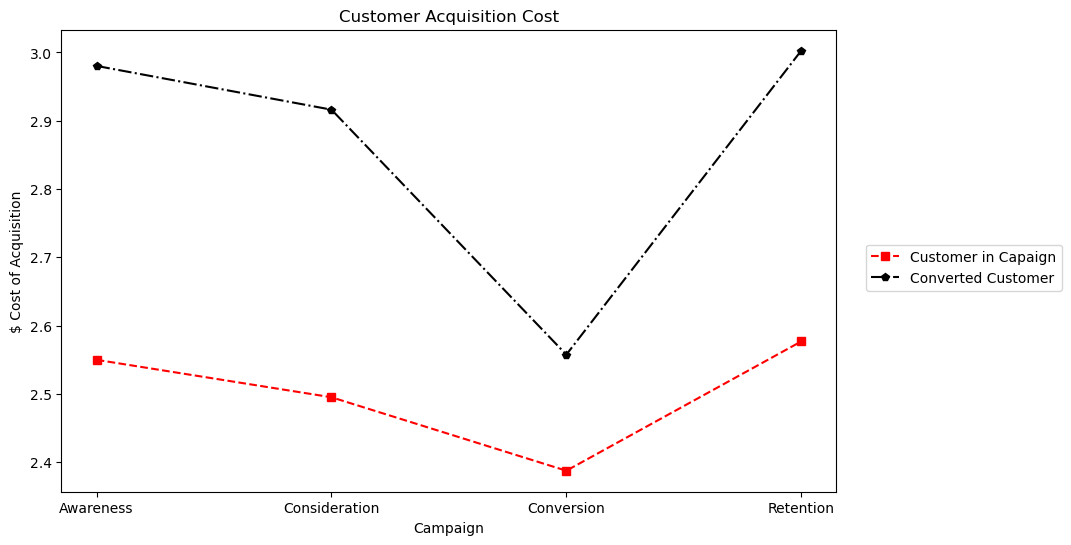

In [161]:
#cost of campaign per customer in $/customer
acq_cost_customer = df.groupby(['CampaignType'])['AdSpend'].mean()/df.groupby(['CampaignType'])['CustomerID'].count()
#cost per converted lead
acq_cost_conversion = df.groupby(['CampaignType'])['AdSpend'].mean()/df.groupby(['CampaignType'])['Conversion'].sum()
plt.figure(figsize = (10,6))
plt.plot(acq_cost_customer,label = 'Customer in Capaign',color = 'r',linestyle = '--',marker = 's')
plt.plot(acq_cost_conversion,label = 'Converted Customer',color = 'k',linestyle = '-.',marker = 'p')
plt.ylabel('$ Cost of Acquisition')
plt.xlabel('Campaign')
plt.title('Customer Acquisition Cost')
plt.legend(bbox_to_anchor = (1.3,.55))
plt.show()

After calculating the acquisition cost, we note that more money is spent retaining customer than obtaining new customers. For future campaigns customer retention should be studied to determine what factors are causing customer retetion to be the most expensive campaign. 

To further understand customer behavior, we can compare how much time each converted customer spends on the website.  

Text(0.5, 1.0, 'Avg. Time Spent on Site for Converted Customers')

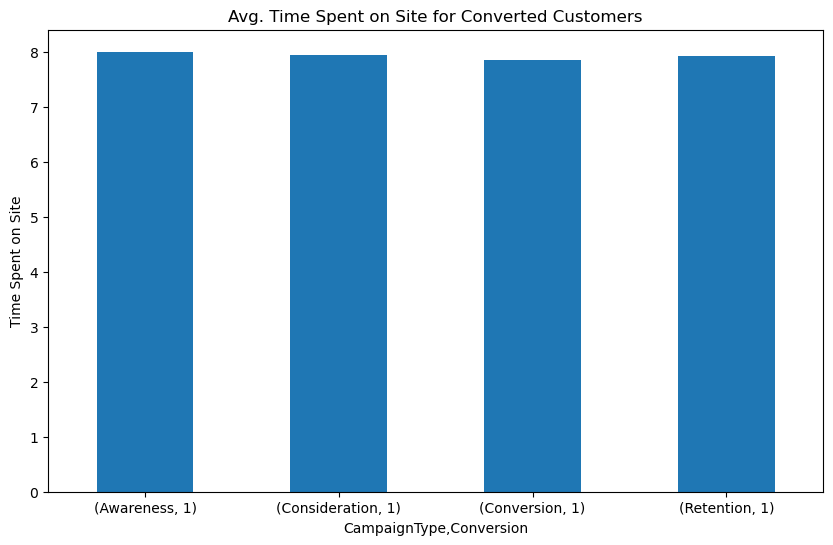

In [162]:
site_time_conversion = df.groupby(['CampaignType','Conversion'])['TimeOnSite'].mean()[1::2]
plt.figure(figsize = (10,6))
site_time_conversion.plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.ylabel('Time Spent on Site')
plt.title('Avg. Time Spent on Site for Converted Customers')

Converted customers spend on average 8 minutes on the site before completing a purchase regardless of campaign. There's no enough historical data to determine how if this average time is in line with other campaigns. 

The last key metric we would like to explore is Average Click Through Rate (CTR) to compare the percentage of customer that clicked on the campaign and completed a purchase. This will help us outline if there is one campaign outperforming the others. 

In [163]:
campaign_ctr = 100*df.groupby(['CampaignType'])['ClickThroughRate'].mean()

Text(0.5, 1.0, 'Avg. Click Through Rate')

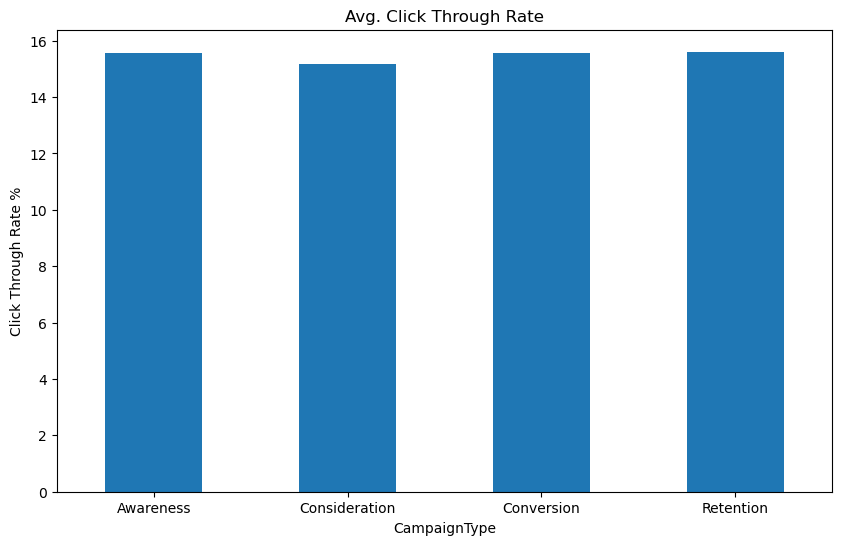

In [164]:
plt.figure(figsize = (10,6))
campaign_ctr.plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.ylabel('Click Through Rate %')
plt.title('Avg. Click Through Rate')

All campaigns have a roughly similar CTR; therefore, we can note that all campaigns are working as intended. 


## ML Models

Now we are ready to start preparing our data to fit and train different models. Both the _AdvertisingPlatform_ and _AdvertisingTool_ columns hold the same value; therefore, we can drop this columns as no additional insight is gained from these columns. 

In [165]:
df = df.drop(['AdvertisingPlatform','AdvertisingTool'],axis = 1)
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


 
All categorical columns needs to be converted to numerical values. To carry out this process, _get_dummies_ from the _Pandas_ library will be used.   
  

In [166]:
df = pd.get_dummies(df,columns = ['Gender','CampaignChannel','CampaignType'],drop_first = True,dtype = int)

In [167]:
df.head()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,688,1,0,0,0,0,1,0,0,0
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,3459,1,1,0,0,0,0,0,0,1
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,2337,1,0,1,0,0,0,0,0,0
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,2463,1,0,1,0,0,0,0,1,0
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,4345,1,0,1,0,0,0,0,1,0


 
 All features are now ready for our selected models.  
  

In [168]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [169]:
X = df.drop('Conversion',axis = 1)
y = df['Conversion']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(classification_report(y_test,lr_pred))
lr_conf = ConfusionMatrixDisplay(confusion_matrix(y_test,lr_pred),display_labels=['Not Converted','Converted'])

              precision    recall  f1-score   support

           0       0.49      0.20      0.29       291
           1       0.90      0.97      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.69      0.59      0.61      2400
weighted avg       0.85      0.88      0.85      2400



In [172]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
rfc_conf = ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred),display_labels=['Not Converted','Converted'])

              precision    recall  f1-score   support

           0       0.66      0.20      0.31       291
           1       0.90      0.99      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.78      0.59      0.62      2400
weighted avg       0.87      0.89      0.86      2400



In [173]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print(classification_report(y_test,gnb_pred))
gnb_conf = ConfusionMatrixDisplay(confusion_matrix(y_test,gnb_pred),display_labels=['Not Converted','Converted'])

              precision    recall  f1-score   support

           0       0.51      0.15      0.24       291
           1       0.89      0.98      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.70      0.57      0.59      2400
weighted avg       0.85      0.88      0.85      2400



In [174]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test,svc_pred))
svc_conf = ConfusionMatrixDisplay(confusion_matrix(y_test,svc_pred),display_labels=['Not Converted','Converted'])

              precision    recall  f1-score   support

           0       0.67      0.19      0.29       291
           1       0.90      0.99      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.78      0.59      0.62      2400
weighted avg       0.87      0.89      0.86      2400



In [175]:
model = [lr_conf,rfc_conf,gnb_conf,svc_conf]
model_name = ['Logistic Regression Model','Random Forest Classifier','Gaussian Naive Baves','SVC ']

## Model Evaluation

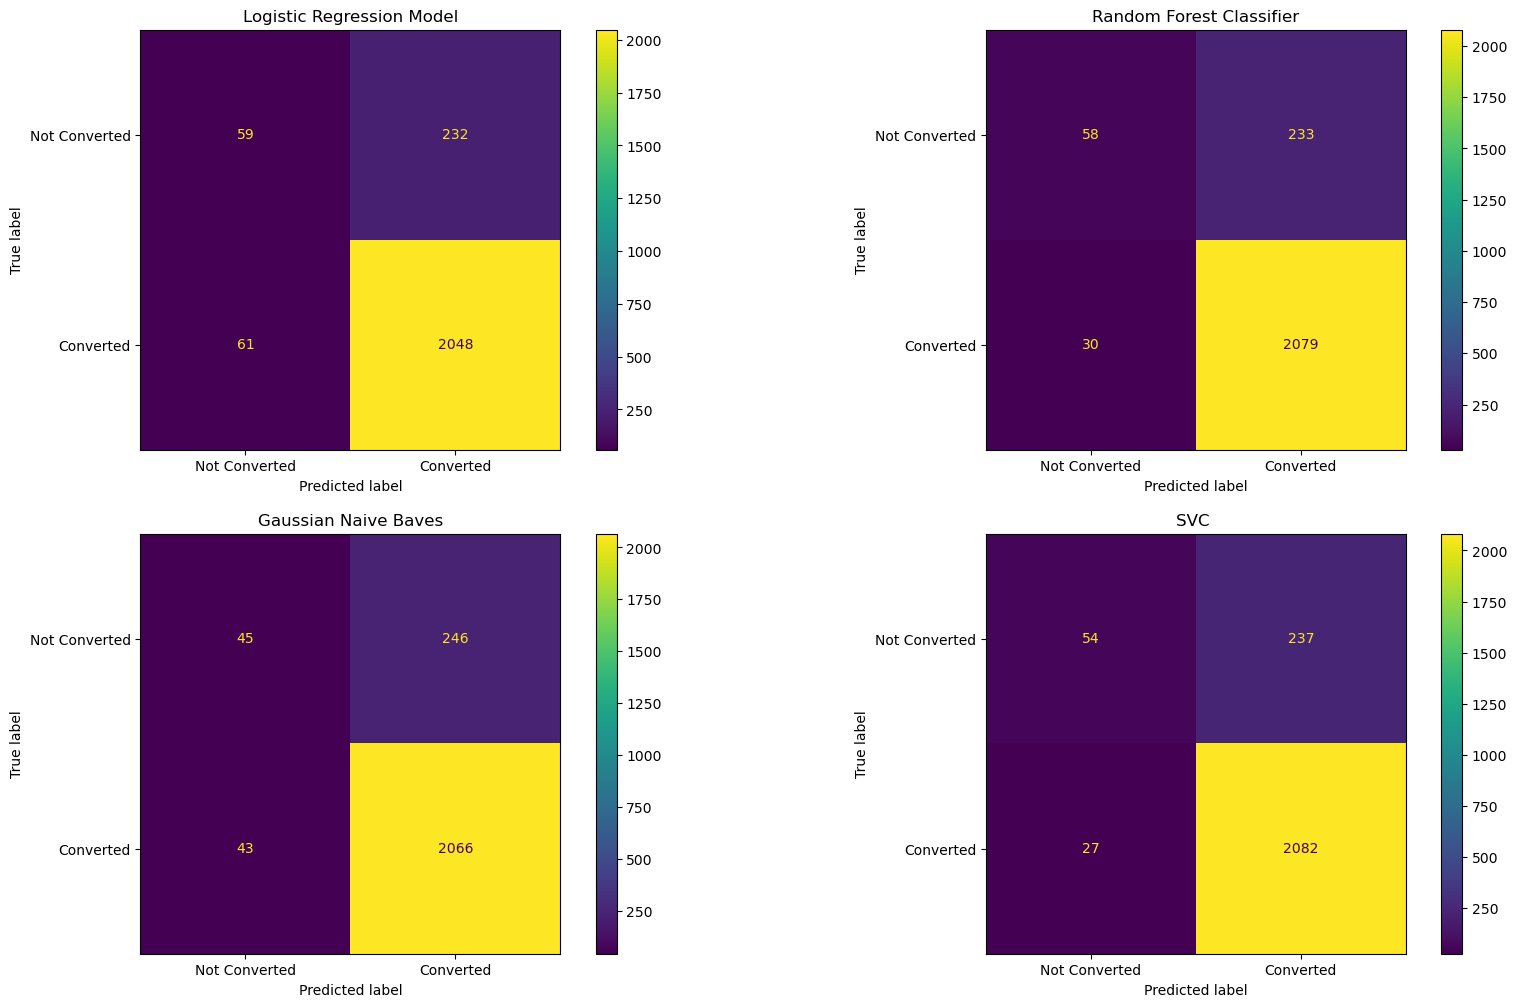

In [176]:
f,ax = plt.subplots(2,2,figsize=(20,12))
x = 0
for i in range(0,2):
    for j in range(0,2):
        model[x].plot(ax = ax[i][j])
        ax[i][j].set_title(model_name[x])
        x+=1

Based on the classification reports and confusion matrix we note that all models perform to roughly similar accuracy. However, by going one step further and evaluating the confusion matrix, we can observe taht the Random Forest Classifier (RFC) model predicts the lowest number of Type 1 (228 false positives) and Type 2 errors (26 false negatives). Given these results we can recommend RFC models to predict a customer behavior and classify if a targeted campaign will cause a purchase. 